In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **1. Handling Missing Data Questions:**

## **How do you identify and handle missing values in a Pandas DataFrame?**


## **Missing values Identification**
**isnull()** and **notnull()**:  These methods return a DataFrame of the same shape as the input, where each element is a Boolean value indicating whether the corresponding element in the original DataFrame is null (NaN) or not.

**info()**: This method provides a concise summary of the DataFrame, including the count of non-null values in each column. Columns with missing values can be easily identified.

**describe()**: This method provides summary statistics of the DataFrame, including count. If the count is less than the total number of rows, there are missing values.

NaN - not a number, missed value of dataset

In [ ]:
# Titanic dataset
df1 = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
# isnull method returns False if value is non-missing and True if value is missing
df1.head().isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
#notnull method returns False if value is missing and True if value is non-missing
df1.head().notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Handling missing values**

**dropna()**: This method is used to remove rows or columns with missing values. By default, it removes any row containing at least one NaN value.

In [ ]:
# Let's create DataFrame to show how methods work

df2 = pd.DataFrame({
    "ID" : [100, 101, 102, np.nan],
    "Name" : ["Aman", "Sultan", "Ruslan", "Eldar"],
    "Salary" : [1000, np.nan, 1200, np.nan]
})

print(df2)
print("\n")
df2.dropna() # this method return rows where no NaN values

      ID    Name  Salary
0  100.0    Aman  1000.0
1  101.0  Sultan     NaN
2  102.0  Ruslan  1200.0
3    NaN   Eldar     NaN




,ID,Name,Salary
0,100.0,Aman,1000.0
2,102.0,Ruslan,1200.0


**fillna(value)**: This method is used to fill missing values with a specified value or a value computed from the DataFrame.

In [ ]:
# this method replace NaN by given value
df2.fillna("value")

,ID,Name,Salary
0,100.0,Aman,1000.0
1,101.0,Sultan,value
2,102.0,Ruslan,1200.0
3,value,Eldar,value


**df.interpolate()** Interpolation: Interpolation is useful when dealing with time series data. It estimates missing values based on existing values.

In [ ]:
# really useful method, replace NaN by itself
df2.interpolate()

,ID,Name,Salary
0,100.0,Aman,1000.0
1,101.0,Sultan,1100.0
2,102.0,Ruslan,1200.0
3,102.0,Eldar,1200.0


**df.ffill() & df bfill()** - Forward or Backward Fill: Using ffill (forward fill) or bfill (backward fill) to fill missing values with the previous or next valid value in the column.

In [ ]:
df2.ffill()

,ID,Name,Salary
0,100.0,Aman,1000.0
1,101.0,Sultan,1000.0
2,102.0,Ruslan,1200.0
3,102.0,Eldar,1200.0


In [ ]:
df2.bfill()

,ID,Name,Salary
0,100.0,Aman,1000.0
1,101.0,Sultan,1200.0
2,102.0,Ruslan,1200.0
3,NaN,Eldar,NaN


## **What is imputation, and why might it be useful in dealing with missing data?**

**Imputation is like fixing gaps in your dataset. When data is missing, imputation helps by estimating or guessing those missing values. Here's why it's useful:**

1. Preserves Data Integrity: Imputation keeps the structure of your dataset intact. Deleting rows with missing values could lead to losing valuable information in other columns.

2. Maintains Sample Size: In analyses or machine learning, having a good number of data points is important. Imputation lets you keep more data, maintaining a larger sample size.

3. Reduces Bias: Deleting data with missing values can introduce bias, especially if the missing data is not random. Imputation aims to provide unbiased estimates based on available information.

4. Enhances Model Performance: Machine learning models work better with complete datasets. Imputation allows you to use more data for training, potentially improving the model's performance.

5. Maintains Variable Relationships: Imputation methods consider relationships between variables, making sure that the filled-in values make sense in the context of the observed data patterns.

Common techniques include replacing missing values with the mean, median, or mode; filling in values based on the last or next observed values in time-series data; using linear regression to predict missing values; and considering values of the nearest neighbors for imputation.

In [ ]:
# Let's show an example
df3 = pd.DataFrame({
    "Place" : [1, 2, np.nan],
    "Goals" : [30, np.nan, 25],
    "XG" : [np.nan, 6, 9]
})

df4 = df3.fillna(df3.mean())

# Imputed DataFrame
df4

,Place,Goals,XG
0,1.0,30.0,7.5
1,2.0,27.5,6.0
2,1.5,25.0,9.0


# **2. Data Transformation Questions:**


**Encoding categorical variables in a Pandas DataFrame means converting labels or categories into numerical values that machine learning models can understand. Here are simple ways to do it:**

1. Nominal Encoding (Using factorize()):
Nominal encoding is used when categories have no specific order.

The factorize() function in pandas helps assign unique numbers to different categories.

Here, Category_encoded will have numbers assigned to 'A', 'B', and 'C', and categories will show the mapping.

In [ ]:
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C']}
df5 = pd.DataFrame(data)

# Nominal encoding using factorize()
df5['Category_encoded'], categories = pd.factorize(df5['Category'])

print(df5)

  Category  Category_encoded
0        A                 0
1        B                 1
2        A                 0
3        C                 2
4        B                 1
5        C                 2


2. Ordinal Encoding:
Ordinal encoding is used when categories have a meaningful order.

You create a mapping dictionary that represents the order, and then use it to encode the categories.

Here, Grade_encoded will represent the order of 'Low', 'Medium', and 'High' based on the mapping.

In [ ]:
data1 = {'Grade': ['Low', 'Medium', 'High', 'Medium', 'Low']}
df6 = pd.DataFrame(data1)

# Mapping dictionary for ordinal encoding
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Ordinal encoding using map()
df6['Grade_encoded'] = df6['Grade'].map(ordinal_mapping)

print(df6)

    Grade  Grade_encoded
0     Low              1
1  Medium              2
2    High              3
3  Medium              2
4     Low              1


# **What is one-hot encoding, and when would you use it in data preprocessing?**


One-hot encoding is a technique used in data preprocessing, primarily in the context of machine learning and data analysis. It is employed to represent categorical variables (those that can take on a limited, fixed number of values) as binary vectors.

1. Representation: For each unique category in the categorical variable, a binary vector is created. The length of this vector is equal to the total number of unique categories. Each element in the vector corresponds to a specific category, and only one element is "hot" (set to 1) to indicate the presence of that category.

2. Binary Format: If there are n unique categories, each category is represented as a binary vector of length n, where all elements are set to 0 except for the one corresponding to the category.

In [ ]:
# Let's how an example

data2 = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df7 = pd.DataFrame(data2)

# Using get_dummies for one-hot encoding
df7_encoded = pd.get_dummies(df7, columns=['Color'], prefix='Color')

# Display the result
df7_encoded

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


When to use one-hot encoding:

*  Categorical Variables in Machine Learning: Many machine learning algorithms require numerical input, and one-hot encoding is a way to convert categorical variables into a format suitable for these algorithms.

*   Preventing Order Implications: One-hot encoding is particularly useful when the categorical variable does not have an inherent order, and treating it as a numerical variable might imply a meaningful order that doesn't actually exist.

*   Avoiding Bias: In cases where the categorical variable doesn't have ordinal relationships, using one-hot encoding helps avoid introducing unnecessary bias into the model.


*   Nominal Data: When dealing with nominal data, where categories don't have a meaningful order, one-hot encoding is a common choice for representation.

# **3. Removing Duplicates Questions:**

## **How do you identify and remove duplicate rows from a DataFrame?**

Identifying and removing duplicate rows from a DataFrame in Python, particularly using the pandas library, involves a few simple steps. Here's an example:

In [ ]:
data3 = {'Column1': [1, 2, 3, 1, 2, 4],
        'Column2': ['A', 'B', 'C', 'A', 'B', 'D']}
df8 = pd.DataFrame(data3)

# Identifying duplicate rows
duplicate_rows = df8[df8.duplicated()]

# Displaying duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Removing duplicate rows
df8_no_duplicates = df8.drop_duplicates()

# Displaying DataFrame without duplicates
print("\nDataFrame without Duplicates:")
print(df8_no_duplicates)

Duplicate Rows:
   Column1 Column2
3        1       A
4        2       B

DataFrame without Duplicates:
   Column1 Column2
0        1       A
1        2       B
2        3       C
5        4       D


In this example:

1. df.duplicated() is used to identify duplicate rows in the DataFrame. It returns a boolean Series where each entry is True if the row is a duplicate (excluding the first occurrence), and False otherwise.

2. The result is stored in the duplicate_rows DataFrame, which can be displayed or further processed.

3. df.drop_duplicates() is used to create a new DataFrame without duplicate rows. This method considers the entire row and keeps the first occurrence while removing subsequent duplicates.

4. The resulting DataFrame without duplicates is stored in df_no_duplicates, which can be used for analysis or other operations.

Keep in mind that the methods mentioned above compare entire rows. If you want to identify and remove duplicates based on specific columns, you can pass the subset argument to both duplicated() and drop_duplicates():

## **Can you explain the difference between the duplicated() and drop_duplicates() methods in Pandas?**

 In pandas, duplicated() and drop_duplicates() are two methods used for identifying and handling duplicate rows in a DataFrame.

1. duplicated():

The duplicated() method is used to identify duplicate rows in a DataFrame.

It returns a boolean Series indicating whether each row is a duplicate or not.

By default, the first occurrence of a duplicated row is marked as False, and subsequent occurrences are marked as True.
You can use this method to filter rows based on their duplicate status.

In [ ]:
data4 = {'A': [1, 2, 2, 3, 4, 4],
        'B': ['x', 'y', 'y', 'z', 'w', 'w']}

df9 = pd.DataFrame(data)

# Check for duplicate rows
duplicate_mask = df9.duplicated()
print(duplicate_mask)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool


2. drop_duplicates():

The drop_duplicates() method is used to remove duplicate rows from a DataFrame.

It returns a new DataFrame with duplicate rows removed.

By default, it keeps the first occurrence of each duplicated row and removes the subsequent occurrences.
It operates on the entire DataFrame or on a specified subset of columns.

In [ ]:
data4 = {'A': [1, 2, 2, 3, 4, 4],
        'B': ['x', 'y', 'y', 'z', 'w', 'w']}

df10 = pd.DataFrame(data4)

# Remove duplicate rows
df10_no_duplicates = df10.drop_duplicates()
print(df10_no_duplicates)

   A  B
0  1  x
1  2  y
3  3  z
4  4  w


**In conclusion, duplicated() is used to identify duplicate rows, while drop_duplicates() is used to create a new DataFrame with duplicate rows removed. Depending on your needs, you may use one or both of these methods to handle duplicate data in your DataFrame.**

# **4. Data Scaling and Normalization Questions:**

## **Discuss the importance of feature scaling in machine learning.**

Feature scaling is like making sure all the ingredients in your recipe are in the same units or scale. Imagine you're baking a cake, and the recipe calls for ingredients in different units like ounces, tablespoons, and cups. To ensure the right balance and taste, you'd want to convert everything to a common unit, like grams. Similarly, in machine learning, feature scaling makes sure that all the "ingredients" (features) in your dataset are on a similar scale or level. This helps algorithms work better and prevents certain features from dominating the others. It's like making sure everyone plays a fair and equal role in the success of your machine learning model!

## **Explain the difference between min-max scaling and z-score normalization.**


*   Min-Max Scaling: Imagine you have a bunch of numbers, and you want to squeeze them all into a specific range, like putting them on a scale from 0 to 1. This is what Min-Max Scaling does. It's like making sure all your values fit between the smallest and largest values you have.
*   Z-score Normalization (Standardization): Now, instead of squeezing your values into a specific range, let's make them play in a game with a mean of 0 and a rule that says how spread out they can be. Z-score Normalization does this. It's like saying, "Let's make the average value 0, and see how far each number is from that average in terms of standard deviations."


In both cases, the goal is to make your data more comparable and friendly to machine learning algorithms. Min-Max Scaling is like putting things on a specific scale, while Z-score Normalization is like making everything play around a common average and rulebook.

# **5. Handling Outliers Questions:**

## **What are outliers, and why might they impact machine learning models?**

**Outliers are data points that are significantly different from the majority of the other data in a dataset. They are like the odd ones out, the extreme values that don't quite fit with the rest.**

Why outliers might impact machine learning models:

Skewing Averages:

1. Imagine you have a group of friends, and most of them earn around $50,000 a year. If one friend happens to be a millionaire, their income is an outlier. If you calculate the average income, it would be heavily influenced by that one friend, giving you a distorted sense of how much your friends typically earn. In a similar way, outliers can skew averages in a dataset.
Influencing Regression Models:

2. Let's say you're predicting house prices based on the number of bedrooms. Most houses have a reasonable number of bedrooms, but there's one gigantic mansion with 100 bedrooms in your dataset. This extreme value might disproportionately influence a regression model, pulling the predicted prices in a direction that doesn't make much sense for the majority of houses.
Impacting Clustering Algorithms:

3. Imagine you're trying to group customers based on their spending habits. Most customers spend a moderate amount, but there's one customer who spends excessively more. This outlier might end up forming a cluster of its own, affecting the grouping and making it less representative of the overall spending patterns.

Examples:

1. Exam Scores:
 Let's say most students in a class score between 60 and 90 on an exam, but one student scores 200. That 200 is an outlier and can greatly impact the class average.

2. Temperature Readings:
If you're recording daily temperatures in a city, and suddenly there's a day with a temperature much higher or lower than usual, that extreme value could be an outlier, impacting the overall temperature trend.

3. Financial Transactions:
Consider a dataset of financial transactions. Most transactions may be in the range of hundreds or thousands of dollars, but a single transaction of millions could be an outlier, affecting any analysis or modeling based on transaction amounts.

Handling outliers is important in machine learning to ensure that models are not unduly influenced by extreme values. Techniques such as removing outliers, transforming data, or using robust models that are less sensitive to extreme values can be employed to mitigate the impact of outliers on machine learning models.

## **Describe different methods for detecting outliers in a dataset in Python**

In [ ]:
# Sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'A': np.random.normal(0, 1, 1000),
    'B': np.random.normal(0, 1, 1000)
})

### **1. Histogram:**

In a histogram, you can visually identify outliers as data points that fall far away from the bulk of the data.

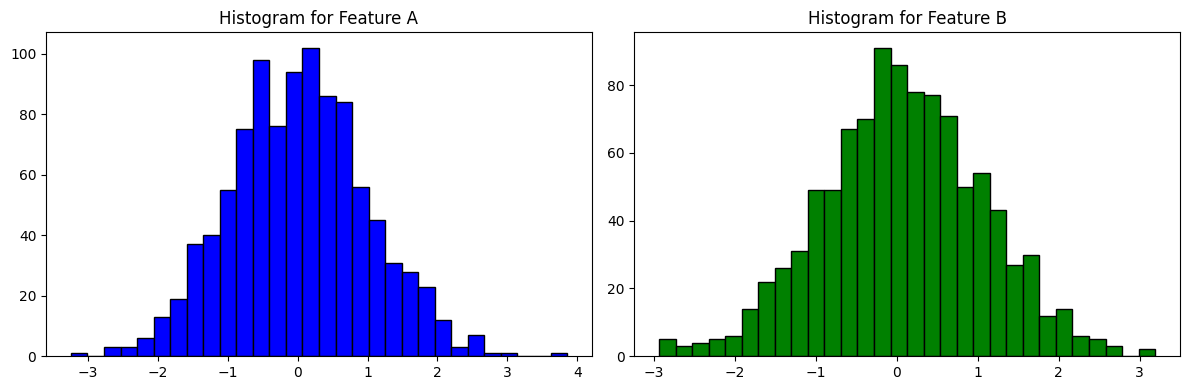

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data['A'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram for Feature A')

plt.subplot(1, 2, 2)
plt.hist(data['B'], bins=30, color='green', edgecolor='black')
plt.title('Histogram for Feature B')

plt.tight_layout()
plt.show()

### **2. Scatter Plot:**

In a scatter plot, outliers can be points that are far away from the main cluster of points.

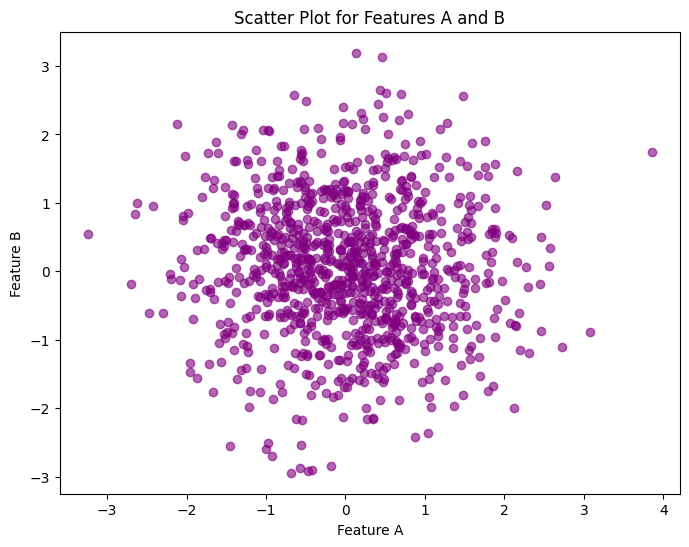

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['A'], data['B'], color='purple', alpha=0.6)
plt.title('Scatter Plot for Features A and B')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.show()

### **3. Pairs Plot (Scatterplot Matrix):**

A pairs plot displays scatter plots for each pair of features, helping to identify outliers and relationships between variables.

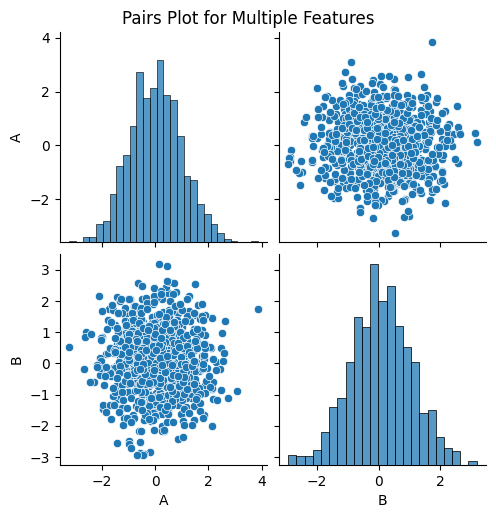

In [ ]:
sns.pairplot(data)
plt.suptitle('Pairs Plot for Multiple Features', y=1.02)
plt.show()

### **4. Boxplot:**

In a boxplot, outliers can be identified as points outside the "whiskers" of the box

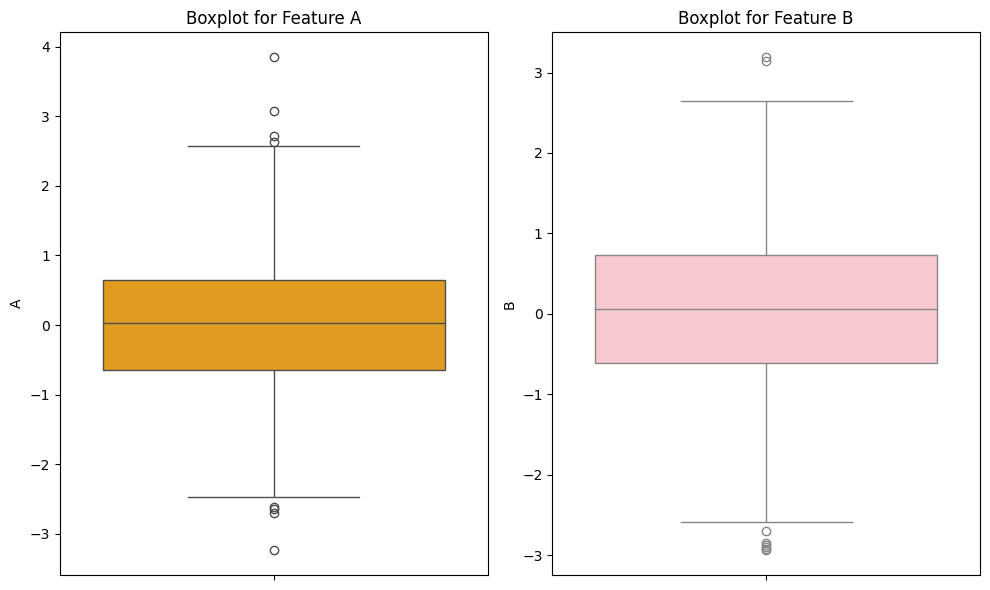

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['A'], color='orange')
plt.title('Boxplot for Feature A')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['B'], color='pink')
plt.title('Boxplot for Feature B')

plt.tight_layout()
plt.show()

### **These visualizations can help you get a sense of the distribution of your data and identify potential outliers. Keep in mind that these methods are exploratory, and further statistical analysis may be needed to confirm and handle outliers in your dataset.**